In [1]:
from collections import defaultdict 
import pandas as pd
import numpy as np

In [2]:
xls = '2020_практикум-3_302_Смородина.xls'

df = pd.read_excel(xls)
df = df.replace('--', np.nan) 

In [3]:
arr = np.arange(len(df.columns)) % 2
I = [np.float(i.split()[3].replace(',','.')) for i in df.iloc[0, arr == 0].values]
S = [np.float(col.split()[3].replace(',','.')) for col in df if col.startswith('S')]
t = [col for col in df if col.startswith('S')]
r = [col for col in df if col.startswith('Unnamed')]
T = df.loc[2:][t].to_numpy()
R = df.loc[2:][r].to_numpy()

d = defaultdict(dict, {k:{} for k in S})
_ = [d[s].update({i:{}}) for s, i in zip(S, I)]

for i, j in enumerate(zip(S, I)):
    for k in zip(T, R):
        d[j[0]][j[1]].update({k[0][i]:k[1][i]})

In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


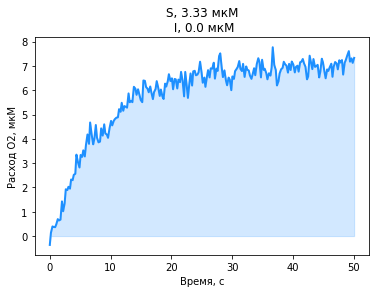

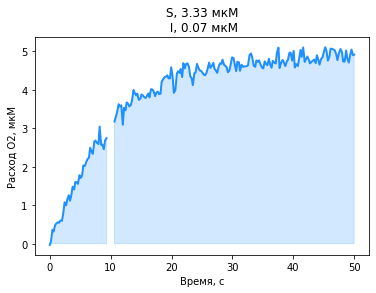

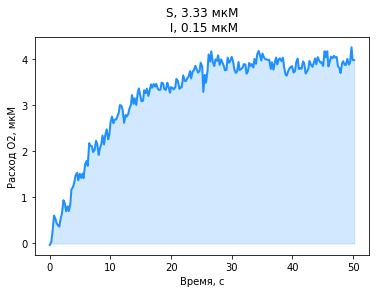

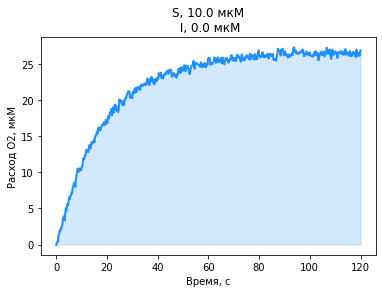

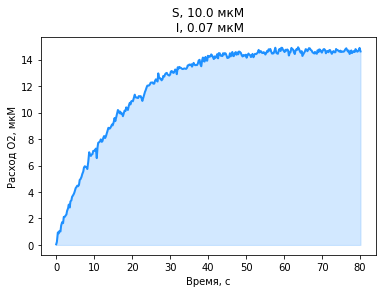

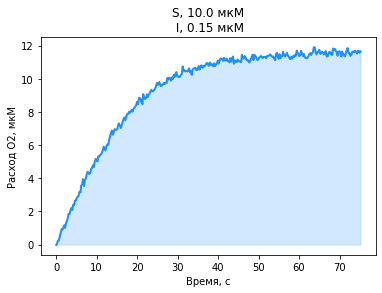

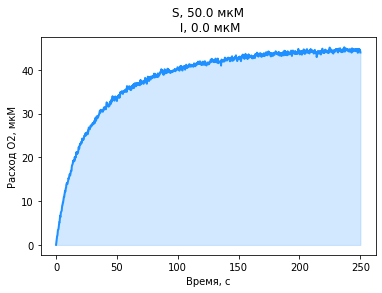

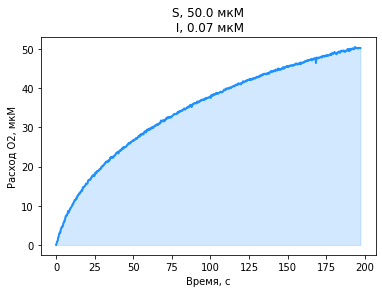

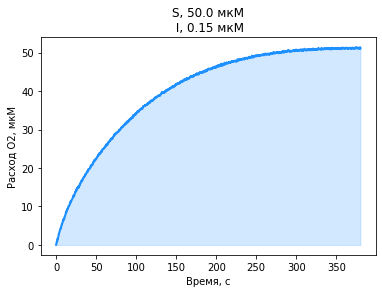

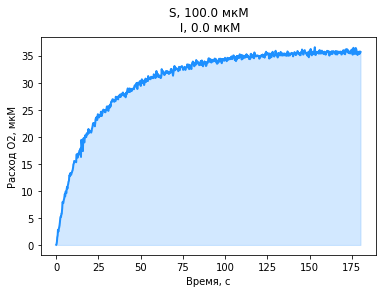

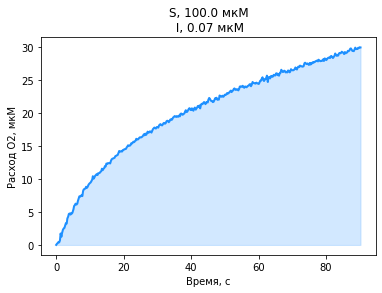

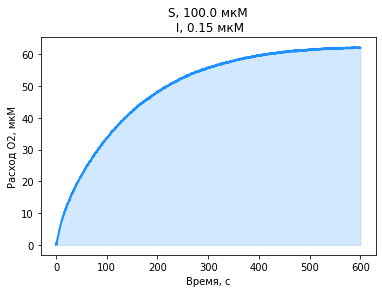

In [4]:
import matplotlib.pyplot as plt

for i in d:
    for j in d[i]:
        plt.title(f'S, {i} мкМ\n I, {j} мкМ')  
        plt.xlabel('Время, с')
        plt.ylabel('Расход O2, мкМ')
        
        plt.plot(list(d[i][j].keys()), list(d[i][j].values()), linewidth=2, color = 'dodgerblue')
        plt.fill_between(list(d[i][j].keys()), list(d[i][j].values()), alpha = 0.2, color = 'dodgerblue')
        plt.show()

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

intervals = defaultdict(dict, {k:{} for k in S})
_ = [intervals[s].update({i:list()}) for s, i in zip(S, I)]
linear_results = defaultdict(dict, {k:{} for k in S})
_ = [linear_results[s].update({i:0.0}) for s, i in zip(S, I)]

In [6]:
#intervals[3.33][0.0] = 0, 6
#intervals[3.33][0.07] = 0, 9
#intervals[3.33][0.15] = 0, 10
#intervals[10.0][0.0] = 0, 13
#intervals[10.0][0.07] = 0, 10
#intervals[10.0][0.15] = 0, 9
#intervals[50.0][0.0] = 0, 8
#intervals[50.0][0.07] = 0, 7
#intervals[50.0][0.15] = 0, 10
#intervals[100.0][0.0] = 0, 9
#intervals[100.0][0.07] = 0, 7
#intervals[100.0][0.15] = 0, 14

In [7]:
intervals[3.33][0.0] = 0, 50
intervals[3.33][0.07] = 0, 50
intervals[3.33][0.15] = 0, 50
intervals[10.0][0.0] = 0, 50
intervals[10.0][0.07] = 0, 50
intervals[10.0][0.15] = 0,50
intervals[50.0][0.0] = 0, 50
intervals[50.0][0.07] = 0,50
intervals[50.0][0.15] = 0, 50
intervals[100.0][0.0] = 0,50
intervals[100.0][0.07] = 0,50
intervals[100.0][0.15] = 0, 50

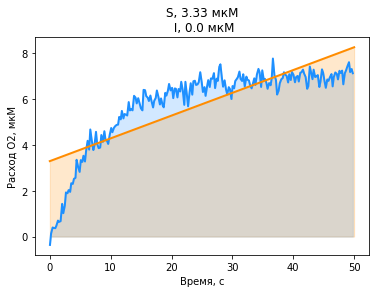

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.04969 мкМ/сек;
R-squared: 0.665


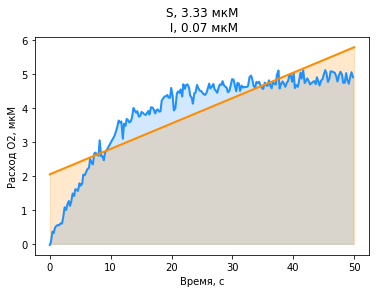

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.03734 мкМ/сек;
R-squared: 0.718


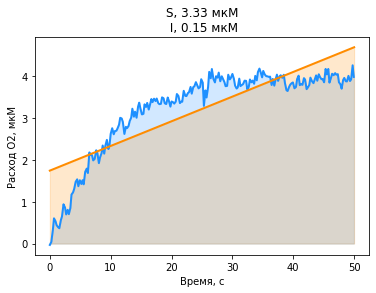

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.02944 мкМ/сек;
R-squared: 0.696


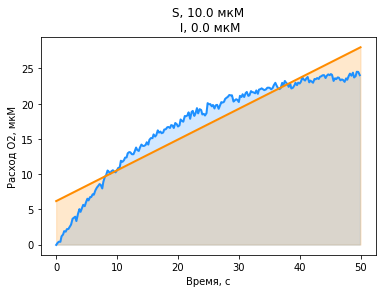

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.21828 мкМ/сек;
R-squared: 0.883


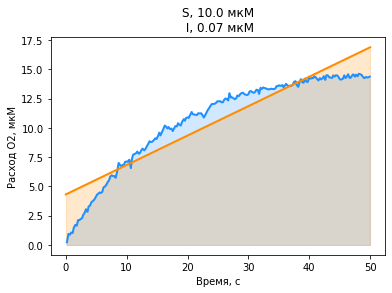

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.12568 мкМ/сек;
R-squared: 0.871


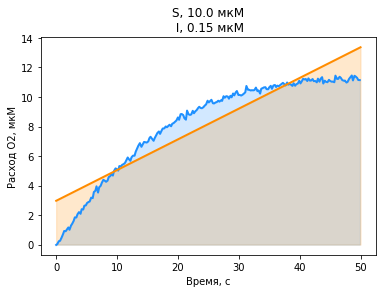

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.10399 мкМ/сек;
R-squared: 0.863


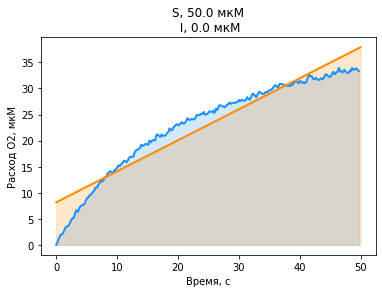

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.29732 мкМ/сек;
R-squared: 0.918


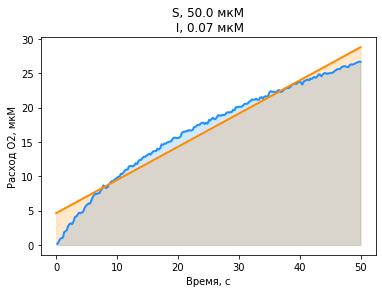

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.24147 мкМ/сек;
R-squared: 0.962


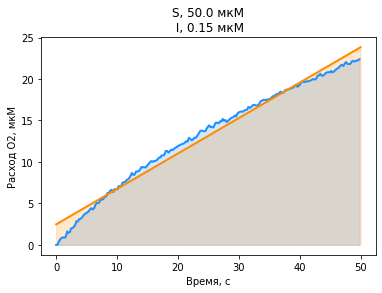

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.2135 мкМ/сек;
R-squared: 0.981


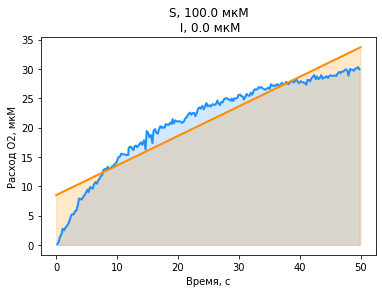

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.25188 мкМ/сек;
R-squared: 0.892


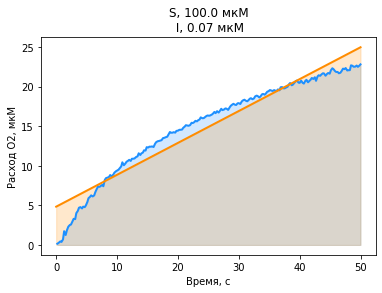

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.20128 мкМ/сек;
R-squared: 0.936


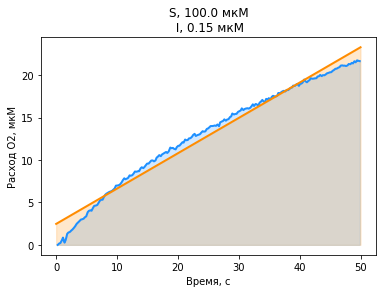

Диапазон аппроксимации, сек: 0-50 (начало-конец);
Cкорость: 0.20817 мкМ/сек;
R-squared: 0.978


In [8]:
plot_k = 0
stoichiometric = 2

for i in d:
    for j in d[i]:
        x = list(x for x in d[i][j].keys() if x < intervals[i][j][1] and x >= intervals[i][j][0])
        x = np.array(x).reshape((-1, 1)) 
        y = np.array(list(y[1] for y in enumerate(d[i][j].values()) if list(d[i][j].keys())[y[0]] >= intervals[i][j][0] and list(d[i][j].keys())[y[0]] < intervals[i][j][1]))

        model = LinearRegression()
        model.fit(x, y)
        r_sq = model.score(x, y)
        k = model.coef_[0]
        b = model.intercept_
        linear_results[i][j] = k / stoichiometric
        if plot_k == 0 or i == plot_k:
            plt.title(f'S, {i} мкМ\n I, {j} мкМ')  
            plt.xlabel('Время, с')
            plt.ylabel('Расход O2, мкМ')
    
            x_lin = np.linspace(intervals[i][j][0], intervals[i][j][1], 100)
            y_lin = k * x_lin + b
            plt.plot(x, y, linewidth=2, color = 'dodgerblue')
            plt.plot(x_lin, y_lin, linewidth=2, linestyle='-', color = 'darkorange')
            x = np.array(x).reshape((-1))
            plt.fill_between(x, 0, y, alpha = 0.2, color = 'dodgerblue')
            plt.fill_between(x_lin, 0, y_lin, alpha = 0.2, color = 'darkorange')
            plt.show()
            print(f'Диапазон аппроксимации, сек: {intervals[i][j][0]}-{intervals[i][j][1]} (начало-конец);\nCкорость: {round(linear_results[i][j], 5)} мкМ/сек;\nR-squared: {round(r_sq, 3)}')

I = 0.0 мкМ: Km* = 33.1 мкМ, Vm* = 0.57 мкМ/сек, R-squared = 0.9357
I = 0.07 мкМ: Km* = 30.68 мкМ, Vm* = 0.39 мкМ/сек, R-squared = 0.9735
I = 0.15 мкМ: Km* = 46.68 мкМ, Vm* = 0.45 мкМ/сек, R-squared = 0.9801


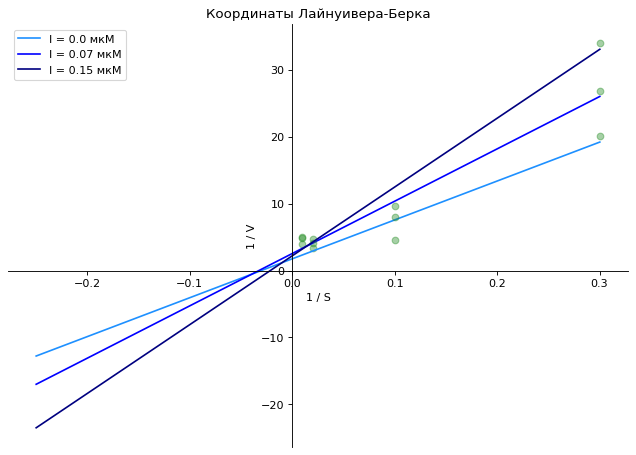

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7), dpi=80)

x_dir = np.array(list(linear_results.keys()))
i_dir = np.array(list(linear_results[x_dir[0]].keys()))

colors = ['dodgerblue', 'blue', 'navy']
for c, i in enumerate(i_dir):
    y_dir = np.array(list(linear_results[x][i] for x in linear_results.keys()))
    x = (1 / x_dir).reshape((-1,1))
    y = 1 / y_dir

    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    k = model.coef_[0]
    b = model.intercept_
    
    Vm = 1 / b
    Km = k / b
 
    x_lin = np.linspace(-0.25, max(x), 100)
    
    print(f"I = {i} мкМ: Km* = {round(k/b, 2)} мкМ, Vm* = {round(1/b, 2)} мкМ/сек, R-squared = {round(r_sq, 4)}")

    y_lin = k * x_lin + b    
    plt.plot(x, y, 'o', alpha=0.4, color='forestgreen')
    plt.plot(x_lin, y_lin, color=colors[c], label=f'I = {i} мкМ')
    
plt.title("Координаты Лайнуивера-Берка")
plt.xlabel("1 / S")
plt.ylabel("1 / V")
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.legend()
plt.show()

In [10]:
def Hyperbl(x, Vm, Km):
    return Vm * x / (Km + x)

def get_k2(Vm, E0):
    return np.float128(Vm / E0)

def result(i, Vm, Km, r_sq):
    print(f'I: {round(i, 5)}, мкМ;\nKm*: {round(Km, 5)}, мкМ;\nVm*: {round(Vm, 5)}, мкМ/сек;\nR-squared: {round(r_sq, 2)}')

def get_r_sq(f, x, y, params):
    residuals = y - f(x, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

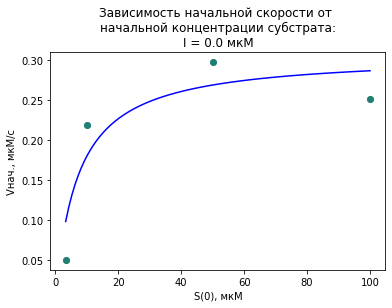

I: 0.0, мкМ;
Km*: 7.12824, мкМ;
Vm*: 0.30708, мкМ/сек;
R-squared: 0.83


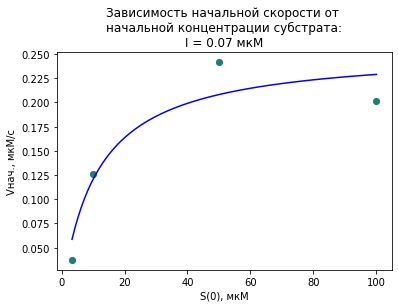

I: 0.07, мкМ;
Km*: 11.11314, мкМ;
Vm*: 0.25434, мкМ/сек;
R-squared: 0.9


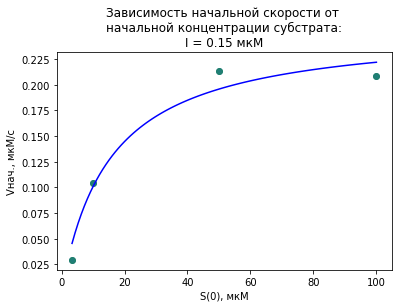

I: 0.15, мкМ;
Km*: 15.40107, мкМ;
Vm*: 0.2561, мкМ/сек;
R-squared: 0.97


In [11]:
from scipy.optimize import curve_fit

vms = dict()
kms = dict()

for c, i in enumerate(i_dir):
    x = np.array(list(linear_results.keys()))
    y = np.array(list(linear_results[x][i] for x in linear_results.keys()))
    plt.plot(x, y, 'o', linewidth=2)
    
    plt.title(f"Зависимость начальной скорости от \nначальной концентрации субстрата:\nI = {i} мкМ")
    plt.xlabel("S(0), мкМ")
    plt.ylabel("Vнач., мкМ/с")

    params = curve_fit(Hyperbl, x, y, maxfev=15000)[0]
    Vm = params[0]
    Km = params[1]

    vms[i] = Vm
    kms[i] = Km

    r_sq = get_r_sq(Hyperbl, x, y, params)
    x_hyp = np.linspace(x[0], x[-1], 100)
    y_hyp = Hyperbl(x_hyp, *params)

    plt.plot(x, y, 'o', alpha=0.4, color='forestgreen')
    plt.plot(x_hyp, y_hyp, color='b')
    plt.show()
    result(i, Vm, Km, r_sq)

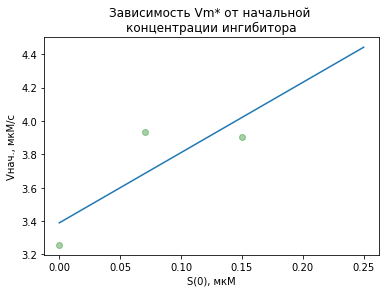

Km = 11.21 мкМ, Vm = 0.3 мкМ/с, Ki = 0.8 мкМ


In [12]:
plt.title(f"Зависимость Vm* от начальной \nконцентрации ингибитора")
plt.xlabel("S(0), мкМ")
plt.ylabel("Vнач., мкМ/с")

x = np.array(list(vms.keys())).reshape((-1, 1))
y = 1/np.array(list(vms.values()))
plt.plot(x, y, 'o', linewidth=2, alpha=0.4, color='forestgreen')

model = LinearRegression()
model.fit(x, y)
k = model.coef_[0]
b = model.intercept_

x_lin = np.linspace(0, 0.25, 100)
y_lin = k * x_lin + b
plt.plot(x_lin, y_lin)
plt.show()
r_sq = model.score(x, y)

print(f"Km = {round(np.mean(list(kms.values())), 2)} мкМ, Vm = {round(1/b, 2)} мкМ/с, Ki = {round(b/k, 2)} мкМ")

S = 3.33 мкМ, A = 20.2, B = 92.2
S = 10.0 мкМ, A = 4.95, B = 33.27
S = 50.0 мкМ, A = 3.42, B = 8.75
S = 100.0 мкМ, A = 4.19, B = 5.38


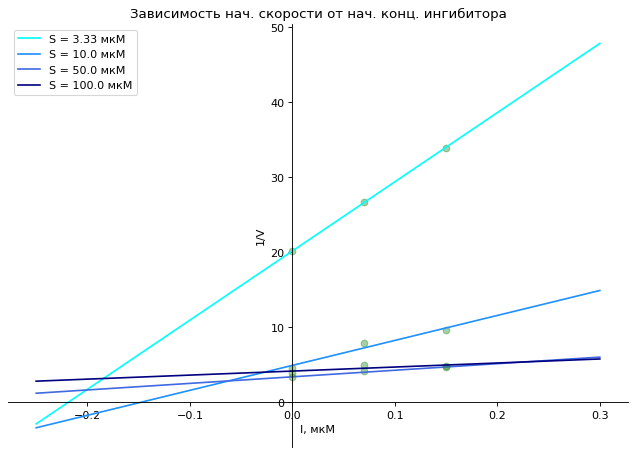

In [13]:
figure(num=None, figsize=(10, 7), dpi=80)
plt.title(f"Зависимость нач. скорости от нач. конц. ингибитора")
plt.xlabel("I, мкМ")
plt.ylabel("1/V")

colors = ['aqua', 'dodgerblue', 'royalblue', 'navy']

kas = dict()
kbs = dict()
kis = dict()

for c, i in enumerate(linear_results.keys()):
    x = np.array(list(linear_results[i].keys())).reshape((-1, 1))
    y = 1/np.array(list(linear_results[i][x] for x in linear_results[i].keys()))
    plt.plot(x, y, 'o', alpha=0.4, color='forestgreen', linewidth=2)

    model = LinearRegression()
    model.fit(x, y)
    k = model.coef_[0]
    b = model.intercept_

    kas[i] = b
    kbs[i] = k
    kis[i] = b/k

    x_lin = np.linspace(-0.25, 0.3, 100)
    y_lin = k * x_lin + b
    plt.plot(x_lin, y_lin, color = colors[c], label = f"S = {i} мкМ")
    print(f"S = {i} мкМ, A = {round(b, 2)}, B = {round(k, 2)}")


ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

Vm = 0.51, Km = 29.46


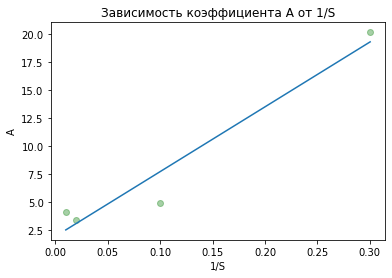

In [14]:
plt.title(f"Зависимость коэффициента A от 1/S")
plt.xlabel("1/S")
plt.ylabel("A")

x = (1/np.array(list(kas.keys()))).reshape((-1, 1))
y = np.array(list(kas.values()))
plt.plot(x, y, 'o', alpha=0.4, color='forestgreen', linewidth=2)

model = LinearRegression()
model.fit(x, y)
k = model.coef_[0]
b = model.intercept_

x_lin = np.linspace(x[0], x[-1], 100)
y_lin = k * x_lin + b
plt.plot(x_lin, y_lin)
Vm = 1/b
Km = k/b
print(f"Vm = {round(1/b, 2)}, Km = {round(k/b, 2)}")

plt.show()

In [15]:
kis = dict()
for s in kbs:
    kis[s] = (s + Km) / (kbs[s] * Vm * s)
    print(f"S = {s} мкМ: Ki = {round(kis[s], 2)} мкМ")
print()
print(f"Средняя Ki: {round(np.mean(list(kis.values())), 2)} мкМ")

S = 3.33 мкМ: Ki = 0.21 мкМ
S = 10.0 мкМ: Ki = 0.23 мкМ
S = 50.0 мкМ: Ki = 0.36 мкМ
S = 100.0 мкМ: Ki = 0.47 мкМ

Средняя Ki: 0.32 мкМ


In [16]:
linear_results

defaultdict(dict,
            {3.33: {0.0: 0.04968840654883604,
              0.07: 0.03733999213169946,
              0.15: 0.029443230449352334},
             10.0: {0.0: 0.21828481943029596,
              0.07: 0.1256821954477902,
              0.15: 0.10398575643854079},
             50.0: {0.0: 0.2973156881688144,
              0.07: 0.24147028803295933,
              0.15: 0.2135043689522873},
             100.0: {0.0: 0.25187867389476726,
              0.07: 0.20127707035701134,
              0.15: 0.20816584239148872}})

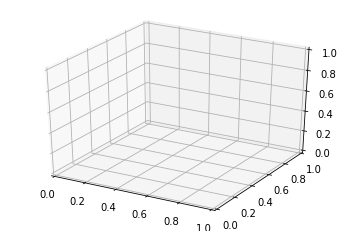

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')

AttributeError: 'Axes3DSubplot' object has no attribute 'sc'

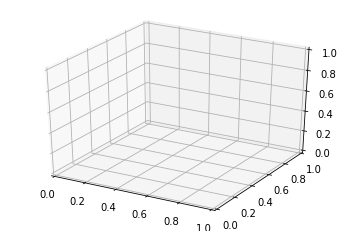

In [18]:
ax = plt.axes(projection='3d')

for i, x in enumerate(linear_results):
    for y, z in linear_results[x].items():
        ax.sc(x, y, z)

In [ ]:
x_dir = np.array(list(linear_results.keys()))
i_dir = np.array(list(linear_results[x_dir[0]].keys()))

In [ ]:
x_dir

In [ ]:
i_dir

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')
plt.show()

In [ ]:
ax.plot_trisurf?


In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7), dpi=80)
ax = plt.axes(projection='3d')

x_dir = np.array(list(linear_results.keys()))
i_dir = np.array(list(linear_results[x_dir[0]].keys()))

colors = ['dodgerblue', 'blue', 'navy']

for c, i in enumerate(i_dir):
    print(i)
    y_dir = np.array(list(linear_results[x][i] for x in linear_results.keys()))
#    print(x_dir)
#    print(y_dir)
#    print(i_dir)
    ax.plot_trisurf(y_dir, x_dir, i)
    
    
#    x = (1 / x_dir).reshape((-1,1))
#    y = 1 / y_dir
#
#    model = LinearRegression()
#    model.fit(x, y)
#    r_sq = model.score(x, y)
#    k = model.coef_[0]
#    b = model.intercept_
#    
#    Vm = 1 / b
#    Km = k / b
# 
#    x_lin = np.linspace(-0.25, max(x), 100)
#    
#    print(f"I = {i} мкМ: Km* = {round(k/b, 2)} мкМ, Vm* = {round(1/b, 2)} мкМ/сек, R-squared = {round(r_sq, 4)}")
#
#    y_lin = k * x_lin + b    
#    plt.plot(x, y, 'o', alpha=0.4, color='forestgreen')
#    plt.plot(x_lin, y_lin, color=colors[c], label=f'I = {i} мкМ')
#    
#plt.title("Координаты Лайнуивера-Берка")
#plt.xlabel("1 / S")
#plt.ylabel("1 / V")
#ax = plt.gca()
#ax.spines['left'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
#ax.spines['top'].set_color('none')
#plt.legend()
#plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

b = np.arange(0.2, 3.2, 0.2)
d = np.arange(0.1, 1.0, 0.1)

B, D = np.meshgrid(b, d)
nu = np.sqrt( 1 + (2*D*B)**2 ) / np.sqrt( (1-B**2)**2 + (2*D*B)**2)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, nu)
plt.xlabel('b')
plt.ylabel('d')
plt.show()

In [ ]:
B

In [ ]:
nu

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


x_dir = np.array(list(linear_results.keys()))
i_dir = np.array(list(linear_results[x_dir[0]].keys()))

#X, I = np.meshgrid(x_dir, i_dir)

for c, i in enumerate(i_dir):
    print(i)
    y_dir = np.array(list(linear_results[x][i] for x in linear_results.keys()))

#B, D = np.meshgrid(b, d)

#nu = np.sqrt( 1 + (2*D*B)**2 ) / np.sqrt( (1-B**2)**2 + (2*D*B)**2)

    fig = plt.figure()
    ax = Axes3D(fig)
   # ax.plot_surface(X, I, y_dir)
    ax.plot3D(X, I, y_dir, linewidth=0, antialiased=False)
    plt.xlabel('b')
    plt.ylabel('d')
    plt.show()

In [ ]:
X

In [ ]:
np.meshgrid?

In [ ]:
surf = ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)

In [ ]:
(0.07 + 0.15) / 2


In [ ]:
100-33

In [ ]:
0.15-0.1